In [1]:
import sys
sys.path.append('../../') # or just install the module
sys.path.append('../../../flaming-choripan') # or just install the module
sys.path.append('../../../astro-lightcurves-handler') # or just install the module

In [2]:
from flamingchoripan.files import search_for_filedirs
from lchandler import C_

root_folder = '../../../surveys-save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_SPLIT_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (../../../surveys-save)
(0) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=curvefit-nostw.splcds - 114.376[mbs]
(1) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=mcmc-nostw.splcds - 113.754[mbs]
(2) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds - 4.557[mbs]
(3) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=curvefit.splcds - 114.712[mbs]
(4) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=bspline-nostw.splcds - 114.516[mbs]
(5) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=linear-nostw.splcds - 114.517[mbs]
(6) - ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe°method=mcmc.splcds - 114.089[mbs]
───

In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.files import load_pickle, save_pickle
from flamingchoripan.files import get_dict_from_filedir
from lchandler import C_

def load_lcdataset(filename):
    assert filename.split('.')[-1]==C_.EXT_SPLIT_LIGHTCURVE
    return load_pickle(filename)

filedir = '../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds'

filedict = get_dict_from_filedir(filedir)
root_folder = filedict['*rootdir*']
cfilename = filedict['*cfilename*']
survey = filedict['survey']
lcdataset = load_lcdataset(filedir)
print(lcdataset['raw'].keys())
print(lcdataset['raw'].get_random_lcobj(False).keys())
print(lcdataset)

> loading: ../../../surveys-save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe.splcds
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y', 'synthetic'])
LCDataset:
[outliers - samples 10]
(*) obs_samples: 541 - min_len: 14 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 1.0[days]
(g) obs_samples: 260 - min_len: 6 - max_dur: 408.0[days] - dur(p50): 133.8[days] - cadence(p50): 3.0[days]
(r) obs_samples: 281 - min_len: 8 - max_dur: 376.0[days] - dur(p50): 128.7[days] - cadence(p50): 3.0[days]
   |█▌      | SLSN - 2/10 (20.00%)
   |▊       | SNIa - 1/10 (10.00%)
   |█▌      | SNIbc - 2/10 (20.00%)
   |████    | allSNII - 5/10 (50.00%)
────────────────────────────────────────────────────────────────────────────────────────────────────
[faint - samples 48]
(*) obs_samples: 1,107 - min_len: 7 - max_dur: 298.1[days] - dur(p50): 40.5[days] - cadence(p50): 1.0[days]
(g) obs_samples: 450 - min_len

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: ../../save/alerceZTFv7.1/survey=alerceZTFv7.1°bands=gr°mode=onlySNe/train/samplers.smplr


../../synthsne/generators/synthetic_curves.py:479: RuntimeWarning: overflow encountered in square
  return -0.5 * np.sum((obs - spm_obs)**2/sigma2 + np.log(sigma2))
../../synthsne/generators/synthetic_curves.py:479: RuntimeWarning: overflow encountered in true_divide
  return -0.5 * np.sum((obs - spm_obs)**2/sigma2 + np.log(sigma2))


(480, 6)


/home/tesla/anaconda3/envs/lchandler/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/tesla/anaconda3/envs/lchandler/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


(480, 6)


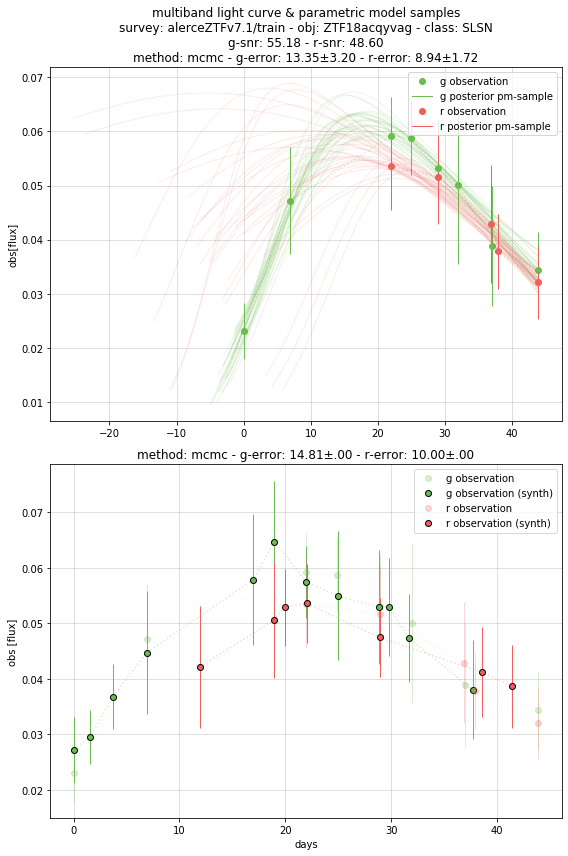

../../synthsne/generators/synthetic_curves.py:479: RuntimeWarning: overflow encountered in square
  return -0.5 * np.sum((obs - spm_obs)**2/sigma2 + np.log(sigma2))
../../synthsne/generators/sne_models.py:40: RuntimeWarning: overflow encountered in exp
  early = 1.0*(A*(1 - (f*(t-t0)/gamma))   /   (1 + np.exp(-(t-t0)/trise)))
../../synthsne/generators/sne_models.py:41: RuntimeWarning: overflow encountered in exp
  late = 1.0*(A*(1-f)*np.exp(-(t-(gamma+t0))/tfall)   /   (1 + np.exp(-(t-t0)/trise)))


(480, 6)


In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from synthsne.generators.synthetic_curves import get_syn_sne_generator
from synthsne.plots.lc import plot_synthetic_samples
from synthsne import C_

set_name = 'train'

save_rootdir = f'../../save/{survey}/{cfilename}/{set_name}'
samplers = load_pickle(f'{save_rootdir}/samplers.{C_.EXT_SAMPLER}')
obse_sampler_bdict = samplers['obse_sampler_bdict']
length_sampler_bdict = samplers['length_sampler_bdict']
    
method = 'uniformprior'
method = 'curvefit'
method = 'mcmc'
#method = 'linear'
#method = 'bspline'

synthetic_samples_per_curve = 32

lcset = lcdataset[set_name]
lcobj_names = [
'ZTF18acqyvag',
'ZTF18aaqvuhl',
'ZTF20aamuqwn',
'ZTF18adasisj',
'ZTF20aavgmli',
'ZTF19aaqcqkv',
'ZTF19aadnxat',
'ZTF19aaripqw',
'ZTF18aaqkdwf',
]
for lcobj_name in lcobj_names:
    if not lcobj_name in lcset.get_lcobj_names():
        continue
    lcobj = lcset[lcobj_name]
    band_names = lcset.band_names
    class_names = lcset.class_names
    gen_kwargs = {
        #'uses_new_bounds':False,
        'uses_new_bounds':True,
    }
    generator_class = get_syn_sne_generator(method)
    sne_generator = generator_class(lcobj, class_names, band_names, obse_sampler_bdict, length_sampler_bdict, **gen_kwargs)
    new_lcobjs, new_smooth_lcojbs, trace_bdict, segs = sne_generator.sample_curves(synthetic_samples_per_curve)
    plot_kwargs = {
        'trace_bdict':trace_bdict,
        #'save_filedir':f'../save/test_{lcobj_name}.png',
        'save_filedir':None,
    }
    plot_synthetic_samples(lcset, set_name, method, lcobj_name, new_lcobjs, new_smooth_lcojbs, **plot_kwargs)
    plt.show()
    #break